In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('seaborn-v0_8')
# sns.set_palette("Set1")

Corr Matrix:
           feature1  feature2  feature3  feature4  feature5  feature6  \
feature1   1.000000  0.832316  0.843088  0.833823  0.839840  0.832981   
feature2   0.832316  1.000000  0.835106  0.829563  0.837454  0.835626   
feature3   0.843088  0.835106  1.000000  0.829146  0.833062  0.829377   
feature4   0.833823  0.829563  0.829146  1.000000  0.832416  0.834341   
feature5   0.839840  0.837454  0.833062  0.832416  1.000000  0.836590   
feature6   0.832981  0.835626  0.829377  0.834341  0.836590  1.000000   
feature7   0.838287  0.833577  0.831512  0.831215  0.832576  0.835446   
feature8   0.825434  0.834652  0.823211  0.828831  0.832142  0.834692   
feature9   0.831997  0.837586  0.833271  0.830097  0.836442  0.834987   
feature10  0.836131  0.833700  0.825039  0.833419  0.831645  0.837468   
feature11  0.836452  0.837571  0.833834  0.835094  0.833133  0.832492   
feature12  0.836365  0.834332  0.835561  0.838065  0.831955  0.835962   
feature13  0.838182  0.833590  0.82594

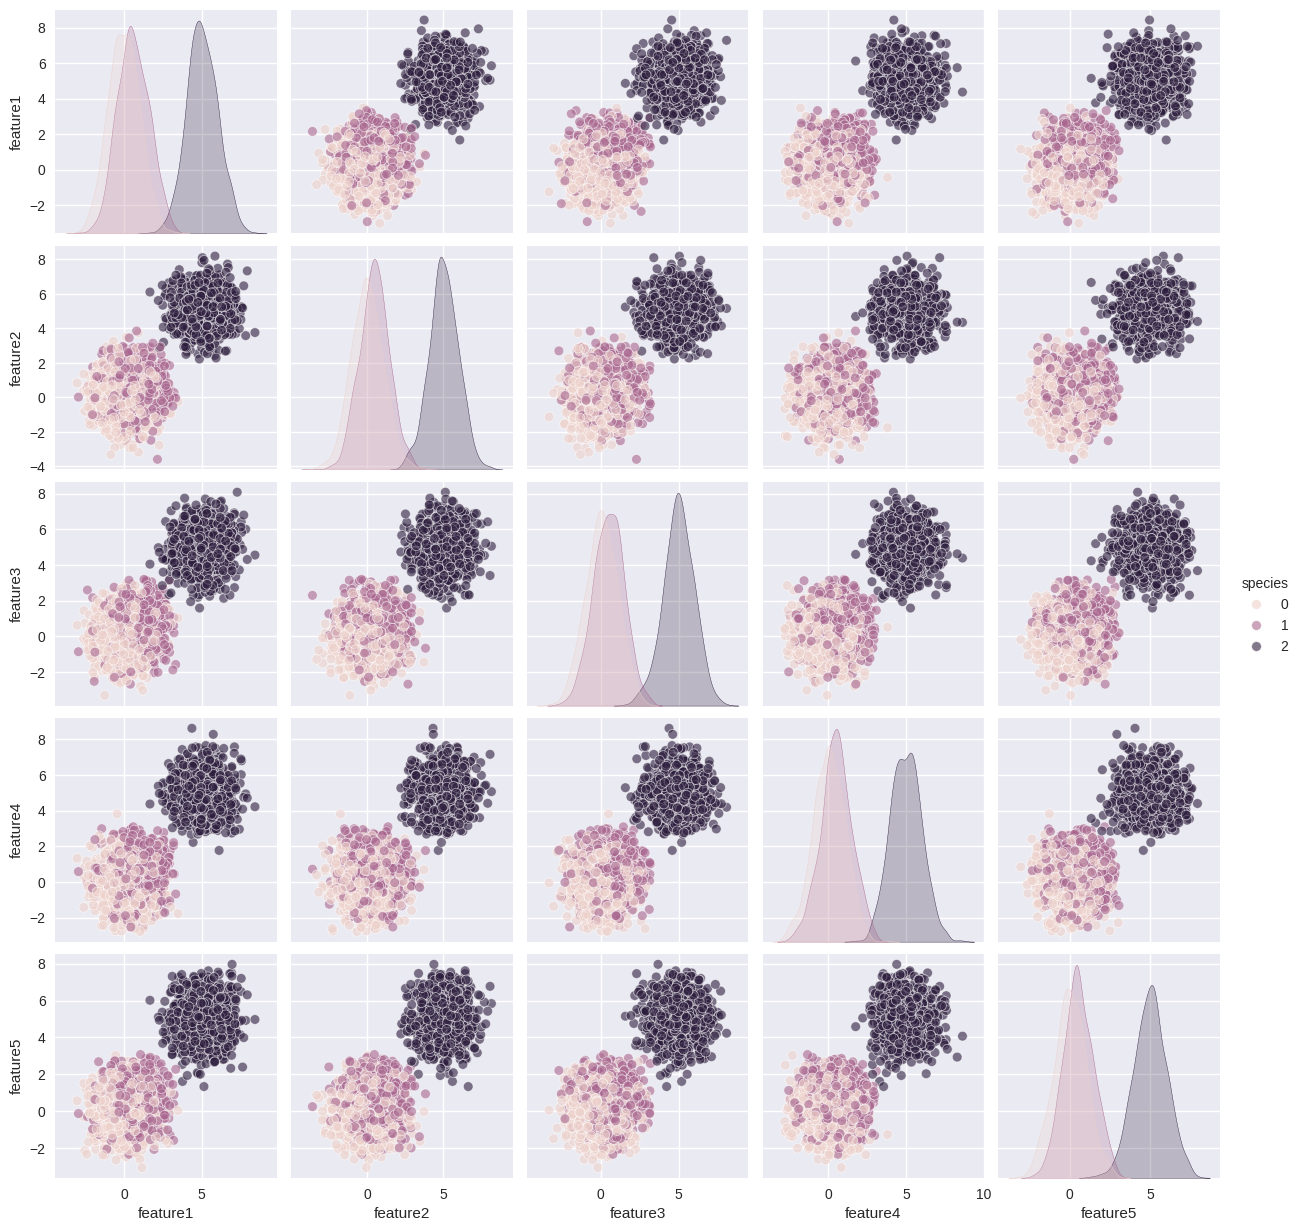

In [12]:
n_samples = 1000
n_features = 16
centers = np.array([
    np.zeros(n_features),
    np.ones(n_features) * 0.5,
    np.ones(n_features) * 5
])

x, y = make_blobs(
    n_samples=[n_samples, n_samples, n_samples],
    centers=centers,
    n_features=n_features,
    cluster_std=[1.0, 1.0, 1.0],
    random_state=43
)

feature_names = [f'feature{i+1}' for i in range(n_features)]
df1 = pd.DataFrame(x, columns=feature_names)
df1['species'] = y

corr_matrix = df1[feature_names].corr()
print('Corr Matrix:')
print(corr_matrix)

selected_features = feature_names[:5]

sns.pairplot(
    data=df1,
    vars=selected_features,
    hue='species',
    plot_kws={'alpha': 0.6},
    diag_kind='kde',
)

plt.show()



In [13]:
def oversample_class(df, target_class, repeat_list, class_col='species'):
    """
    Создает несколько датасетов, где целый класс повторяется разное количество раз.
    
    Parameters:
        df: исходный DataFrame
        target_class: класс, который нужно увеличивать
        repeat_list: список множителей (например [2,5,10,...])
        class_col: название колонки с классами
    Returns:
        dict: ключи - df2, df5,..., значения - новые DataFrame
    """
    dfs = {}
    
    # Разделяем на "увеличиваемый" и остальные
    df_target = df[df[class_col] == target_class]
    df_rest = df[df[class_col] != target_class]
    
    for r in repeat_list:
        df_new = pd.concat([df_target]*r + [df_rest], ignore_index=True)
        dfs[f'df{r}'] = df_new
    
    return dfs

# --- Пример использования ---
repeat_list = [2, 5, 10, 20, 50, 100, 1000, 10000]
target_class = 0  # например, класс 0, который пересекается с другим
oversampled_datasets = oversample_class(df1, target_class, repeat_list)

# Проверка размеров
for name, df in oversampled_datasets.items():
    print(name, df.shape)

df2 (4000, 17)
df5 (7000, 17)
df10 (12000, 17)
df20 (22000, 17)
df50 (52000, 17)
df100 (102000, 17)
df1000 (1002000, 17)
df10000 (10002000, 17)
